In [1]:
# 타이타닉 호 승객 생존 예측 프로젝트

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("data/titanic.xls")
df


# ML, DL의 결과는 총 가지로 나뉜다.
# (분류) : 이진분류[2개], 다중분류[여러개]    || 회귀[값]


## feature selection : 특성 선택
##### X
# pclass : 선실등급(1,2,3), 1등실이 가장 좋음,  범주형 데이터 -> (순서형), int64
# sex : 성별(female:여성, male:남성),           범주형 데이터 -> (명목형), object
# age : 나이,  수치형 데이터,                   수치형 데이터 -> (연속형), float64
# sibsp : 부부형제자매의_수,                    수치형 데이터 -> (이산형), int64
# parch : 부모자식_수,                          수치형 데이터 -> (이산형), int64
# fare : 운임,                                  수치형 데이터 -> (연속형), float64

##### y
# 정답 : survived(0:사망, 1:생존), 이진분류


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
df.describe()  # 통계 정보

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
# 결측치 갯수 출력
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# 운임이 결측치인 사람을 출력하시오.

#df.get( df['fare'].isnull() )
df[ df['fare'].isnull() ]  # df[ 조건 ]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


<AxesSubplot:>

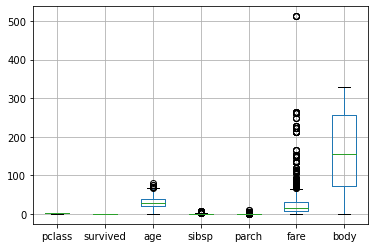

In [8]:
df.boxplot()

In [9]:
# 생존자의 수와 사망자 수
# print("생존자 수:", df[ 'survived' ].sum())                             # 생존자 수
# print("사망자 수:", df[ 'survived' ].count() - df[ 'survived' ].sum())  # 사망자 수

# 0 : 사망
# 1 : 생존
df[ 'survived' ].value_counts()

0    809
1    500
Name: survived, dtype: int64

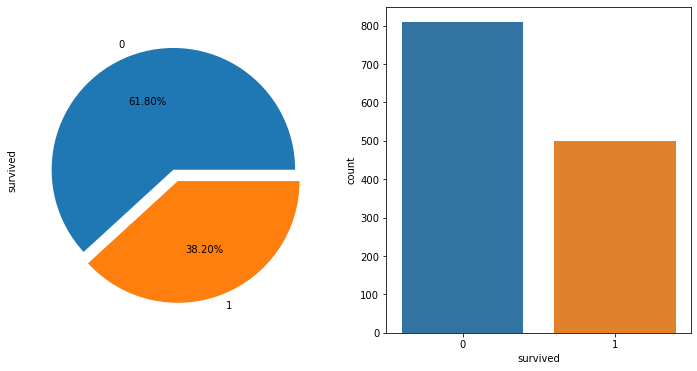

In [10]:
# 시각화
plt.figure(figsize=(12, 6)) # 그래프의 사이즈 바꾸기

# 그래프 2개가 나오게 하기
# subplot(행 열 번째수)
plt.subplot(121)   
df[ 'survived' ].value_counts().plot.pie(explode=[0, 0.1], autopct="%.2f%%")
plt.subplot(122)
sns.countplot( 'survived', data=df )

plt.show()

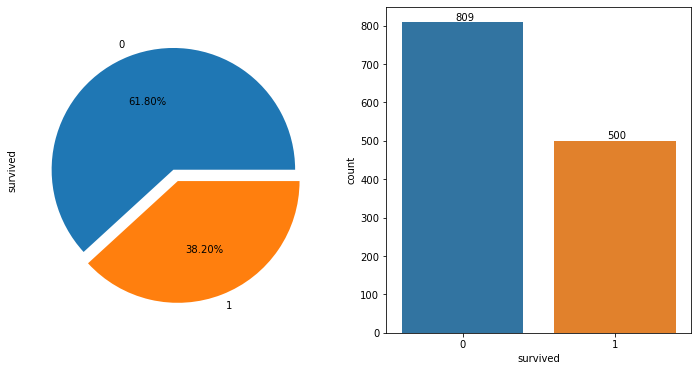

In [11]:
# 시각화2 : 막대그래프에 값을 출력하기 (countplot 에 값들을 출력)
plt.figure(figsize=(12, 6)) # 그래프의 사이즈 바꾸기

# 그래프 2개가 나오게 하기
# subplot(행 열 번째수)
plt.subplot(121)   
df[ 'survived' ].value_counts().plot.pie(explode=[0, 0.1], autopct="%.2f%%")

plt.subplot(122)
graph = sns.countplot( 'survived', data=df )
for p in graph.patches: # 막대부분 = patches
    graph.annotate( f"{p.get_height()}", (p.get_x()+0.35, p.get_height()+5) )

plt.show()

<AxesSubplot:>

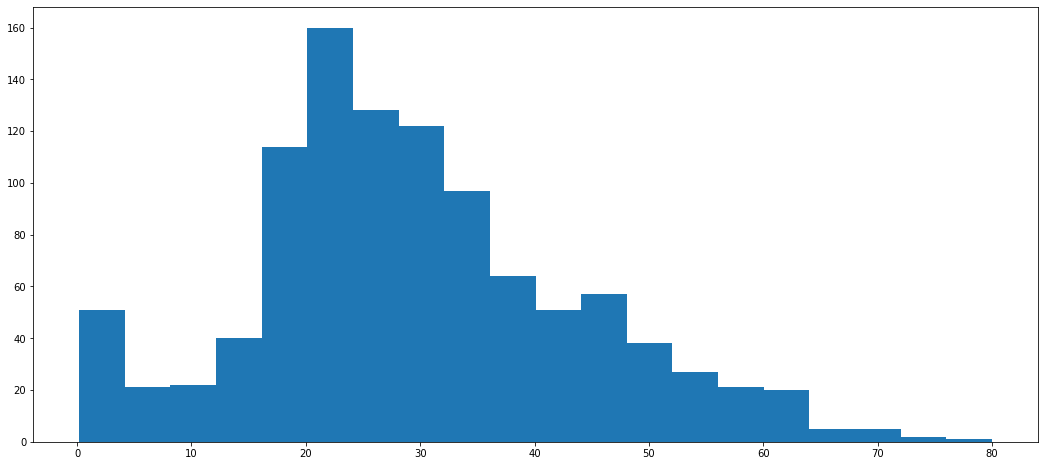

In [12]:
# 연령대 그래프 : 분포도 (히스토그램)
df['age'].hist(bins=20, grid=False, figsize=(18, 8))

In [13]:
# 성별과 생존의 관계 출력
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

In [14]:
df[ ['sex', 'survived'] ].groupby(['sex']).mean()

,survived
sex,
female,0.727468
male,0.190985


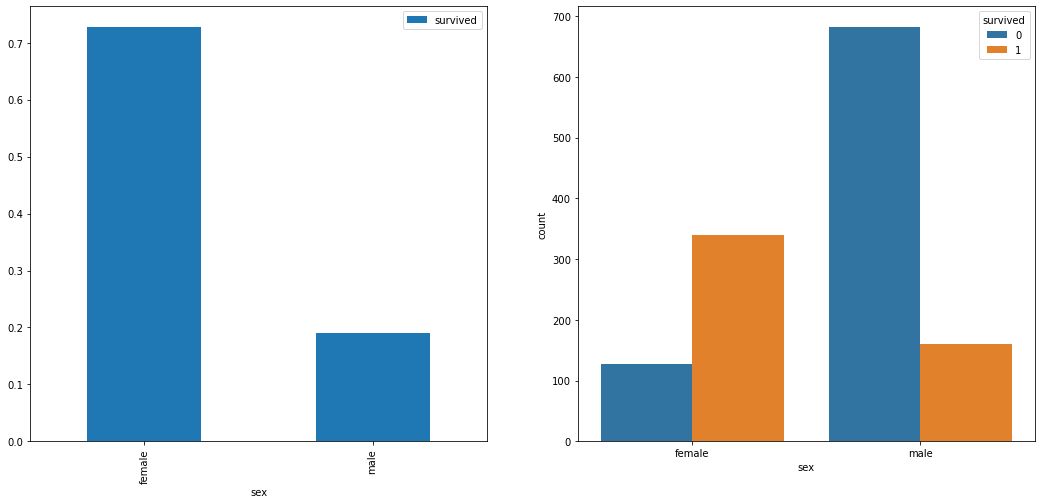

In [15]:
# 남녀별 생존 그래프
plt.figure(figsize=(18,8))

sub1 = plt.subplot(121)
df[ ['sex', 'survived'] ].groupby(['sex']).mean().plot.bar(ax=sub1)

plt.subplot(122)
sns.countplot('sex', hue='survived', data=df) # 남여별 생존인원 수

plt.show()

In [16]:
# 선실 등급별 데이터 체크, 그래프
# pd.crosstab(행, 열)
pd.crosstab(df['pclass'], df['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


<AxesSubplot:xlabel='pclass'>

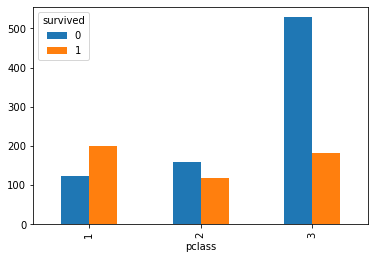

In [17]:
# pd.crosstab(df['pclass'], df['survived']).plot(kind='bar')
pd.crosstab(df['pclass'], df['survived']).plot.bar()

In [18]:
# 선실 등급별 통계(평균)
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [19]:
# 상관 관계(=상관 계수) 출력
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


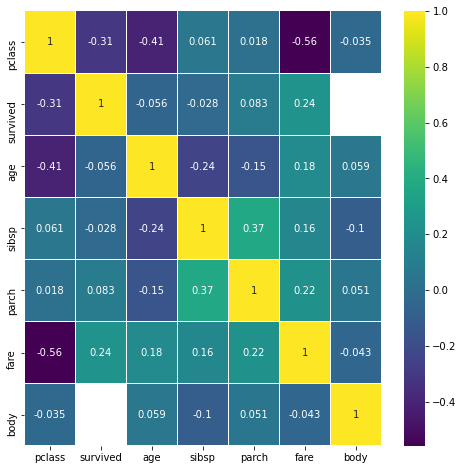

In [20]:
# 상관계수 그래프
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.01, annot=True, cmap=plt.cm.viridis)

plt.show()

In [21]:
# 2일차 시작

In [22]:
# 연령대 칼럼 추가
# 0 ~ 9 : baby,  10 ~ 19 : teenage,  20 ~ 49 : adult,  50 ~ 100 : old
df['age_cat'] = pd.cut(df['age'], bins=[0,10,20,50,100], include_lowest=True, 
                       labels=['baby', 'teenage', 'adult', 'old'])

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


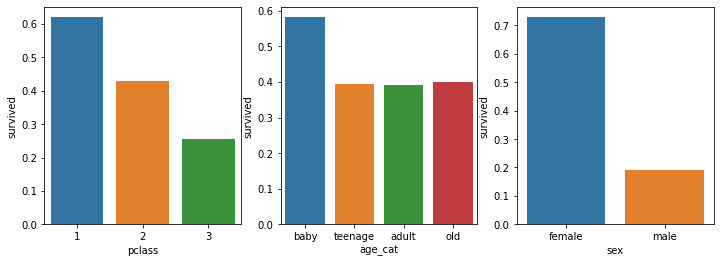

In [23]:
# 선실 등급, 연령대, 성별에 따른 생존 그래프
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.barplot('pclass', 'survived', data=df, ci=None)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=df, ci=None)
plt.subplot(133)
sns.barplot('sex', 'survived', data=df, ci=None)

plt.show()

In [24]:
# 보트 탑승 정보
df['boat'].count() # 486명

boat_survivors = df[ df['boat'].notnull() ]
boat_counts = boat_survivors['survived'].value_counts()

print(boat_counts)

1    477
0      9
Name: survived, dtype: int64


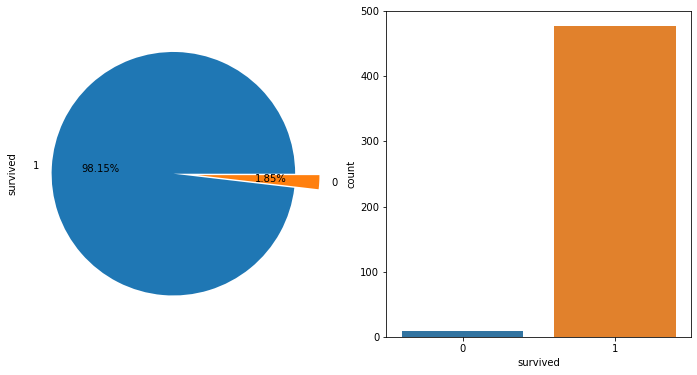

In [25]:
# 보트 탑승에 따른 생존 여부 그래프
plt.figure(figsize=(12, 6))

plt.subplot(121)
boat_counts.plot.pie(explode=[0, 0.2], autopct="%.2f%%")
plt.subplot(122)
sns.countplot('survived', data=boat_survivors)

plt.show()

In [26]:
# 데이터 정제
# 성별(sex) 문자열 ==> 숫자 (female : 1,  male : 0)

### old 코드
# tmp = []
# for i in df['sex']:
#     if i == "female":
#         tmp.append(1)
#     else:
#         tmp.append(0)
        
# df['sex'] = tmp
# df



### new 코드
df['sex'] = df['sex'].map({ 'female':1, 'male':0 })
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


In [27]:
df.info() # sex가 object에서 int64로 변한것을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   int64   
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 144.8+ KB


In [28]:
df.isnull().sum() # 결측치의 수 확인

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
age_cat       263
dtype: int64

In [29]:
# 나이 결측치 채우기

In [30]:
# 이니셜 뽑기 (ex. Mr, Miss 등.)
df['initial'] = 0
for i in df:
    df['initial'] = df['name'].str.extract("([A-Za-z]+)\.")

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,Miss
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,Mr
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,Mr


In [31]:
# 이니셜과 성별을 출력   
pd.crosstab(df['initial'], df['sex']).T.style.background_gradient(cmap='summer_r')

# 여기서 의사(Dr)은 여자와 남자 두개가 섞여있는 것을 알 수 있는데,
# 이 부분을 Other로 처리할 예정

# 추가적으로 성직자(Rev)도 Other로 할 예정

initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
0,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1
1,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0


In [32]:
initial = ['Capt', 'Col', 'Countess', 'Don', 'Dona',
           'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
           'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs',
           'Ms', 'Rev', 'Sir']

In [33]:
# 이니셜별 결측치 출력
for i in initial:
    print( i, df[ df['initial'] == i ]['age'].isnull().sum() )

Capt 0
Col 0
Countess 0
Don 0
Dona 0
Dr 1
Jonkheer 0
Lady 0
Major 0
Master 8
Miss 50
Mlle 0
Mme 0
Mr 176
Mrs 27
Ms 1
Rev 0
Sir 0


In [34]:
# 최종 Master(=어린아이), Miss, Mr, Mrs, Other 로 변경 예정

before = ['Capt', 'Col', 'Countess', 'Don', 'Dona',
          'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle',
          'Mme', 'Ms', 'Rev', 'Sir']

after = ['Mr', 'Mr', 'Mrs', 'Mr', 'Miss',
         'Other', 'Mr', 'Mrs', 'Mr', 'Miss',
         'Mrs', 'Miss', 'Other', 'Mr']

df['initial'].replace(before, after, inplace=True)

In [35]:
# Master(어린 아이) 나이의 평균   
df[ df['initial'] == "Master" ]['age'].mean()  # 5.482703773584906 ==> 5살
                                               # (==> 8명의 결측치에 이 값을 넣어줄 예정)

5.482703773584906

In [36]:
# 전체 이니셜별 나이 평균
df.groupby('initial')['age'].mean()

initial
Master     5.482704
Miss      21.904595
Mr        32.569374
Mrs       36.959538
Other     42.333333
Name: age, dtype: float64

In [37]:
# 결측치를 각 이니셜의 평균으로 대체하기

df.loc[ (df['age'].isnull()) & (df['initial'] == "Master"), 'age' ] = 5
df.loc[ (df['age'].isnull()) & (df['initial'] == "Miss"), 'age' ] = 22
df.loc[ (df['age'].isnull()) & (df['initial'] == "Mr"), 'age' ] = 33
df.loc[ (df['age'].isnull()) & (df['initial'] == "Mrs"), 'age' ] = 37
df.loc[ (df['age'].isnull()) & (df['initial'] == "Other"), 'age' ] = 42

In [38]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
age_cat       263
initial         0
dtype: int64

In [39]:
# 운임 결측치인 사람 빼고 (notnull)인 사람들만 다시 담기
df = df[ df['fare'].notnull() ]
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,Miss
1305,3,0,"Zabour, Miss. Thamine",1,22.0000,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,Mr
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,Mr


In [40]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
age_cat       263
initial         0
dtype: int64

In [41]:
# ML을 위한 X, y 만들기

In [42]:
# X

#        [ 선실등급,  성별,  나이,  형제자매수, 부모자식수, 운임]
x_cols = [ 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare' ]   # X
X = df[ x_cols ].values   # numpy array 로 리턴해줌
X

array([[  1.    ,   1.    ,  29.    ,   0.    ,   0.    , 211.3375],
       [  1.    ,   0.    ,   0.9167,   1.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,   2.    ,   1.    ,   2.    , 151.55  ],
       ...,
       [  3.    ,   0.    ,  26.5   ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  27.    ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  29.    ,   0.    ,   0.    ,   7.875 ]])

In [43]:
# y
y = df['survived'].values
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
##### 데이터 전처리 완료!!!

In [45]:
# ML 코딩 5단계
# 1. 훈련 데이터와 테스트 데이터로 분리 : (X_train, X_test), (y_train, y_test)
# 2. 머신러닝 알고리즘 선택             : ex) DecesionTreeClassifier  (Classifier : 분류, Regressor : 회귀, 값)
# 3. 훈련                               : model.fit(X_train, y_train)
# 4. 점수                               : model.score(X_test, y_test)
# 5. 새 데이터로 예측                   : ex) 디카프리오 정보로 생존 예측

In [46]:
# 1. 훈련 데이터와 테스트 데이터로 분리 : (X_train, X_test), (y_train, y_test)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # 내부적으로 섞은 후, 테스트 테이터를 10%를 넣어준다.

In [49]:
X_train[0] # array([ 2. ,  1. , 22. ,  0. ,  0. , 10.5])  random_state=42 일 때, 재현성

array([ 2. ,  1. , 22. ,  0. ,  0. , 10.5])

In [50]:
# 2. 머신러닝 알고리즘 선택             : ex) DecesionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier  # 첫 글자가 대문자이면 클래스, 객체지향언어

In [52]:
tree_clf = DecisionTreeClassifier(max_depth=5) # 생성자 호출 (객체를 만든다.)   max_depth=5 (하이퍼 파라미터 튜닝 --> )

In [53]:
# 3. 훈련                               : tree_clf.fit(X_train, y_train)

In [54]:
tree_clf.fit(X_train, y_train)  # 훈련할 X와 정답 y를 가지고 학습

DecisionTreeClassifier(max_depth=5)

In [55]:
# 4. 점수                               : tree_clf.score(X_test, y_test)

In [56]:
tree_clf.score(X_train, y_train)  # 훈련 점수

0.8334749362786746

In [57]:
tree_clf.score(X_test, y_test)  # 테스트 점수

0.8244274809160306

In [58]:
# 5. 새 데이터로 예측                   : ex) 디카프리오 정보로 생존 예측

In [61]:
# 디카프리오 정보를 통해 생존 여부 확인하기

#          [ 선실등급:3,  성별(남:0),  나이:19,  형제자매수:0, 부모자식수:0, 운임:10달러]
dicaprio = [ [3, 0, 19, 0, 0, 10] ]  # 훈련 데이터는 2차원 array로 저장되므로 디카프리오 정보도 2차원 배열로 선언해야한다.
survived = tree_clf.predict(dicaprio)
print(survived)  # [0] ==> 0은 사망

result = tree_clf.predict_proba(dicaprio)  # %(0.0 ~ 1.0 사이의 값) 로 리턴 
print(result)  # [[0.85606061 0.14393939]]  ==>  [[사망확률 생존확률]]
print(f"생존 확률:{result[0][1] * 100:.2f}% ") # 생존 확률:14.39% 

[0]
[[0.85606061 0.14393939]]
생존 확률:14.39% 


In [76]:
# 윈슬릿 정보를 통해 생존 여부 확인하기

#          [ 선실등급:1,  성별(여:1),  나이:17,  형제자매수:1, 부모자식수:2, 운임:100달러]
winslet = [ [1, 1, 17, 1, 2, 100] ]  # 훈련 데이터는 2차원 array로 저장되므로 디카프리오 정보도 2차원 배열로 선언해야한다.
survived = tree_clf.predict(winslet)
print(survived)  # [0] ==> 0은 사망

result = tree_clf.predict_proba(winslet)  # %(0.0 ~ 1.0 사이의 값) 로 리턴 
print(result)  # [[0.85606061 0.14393939]]  ==>  [[사망확률 생존확률]]
print(f"생존 확률:{result[0][1] * 100:.2f}% ") # 생존 확률:14.39% 

[1]
[[0.02112676 0.97887324]]
생존 확률:97.89% 


In [77]:
# 설명 가능한 인공지능

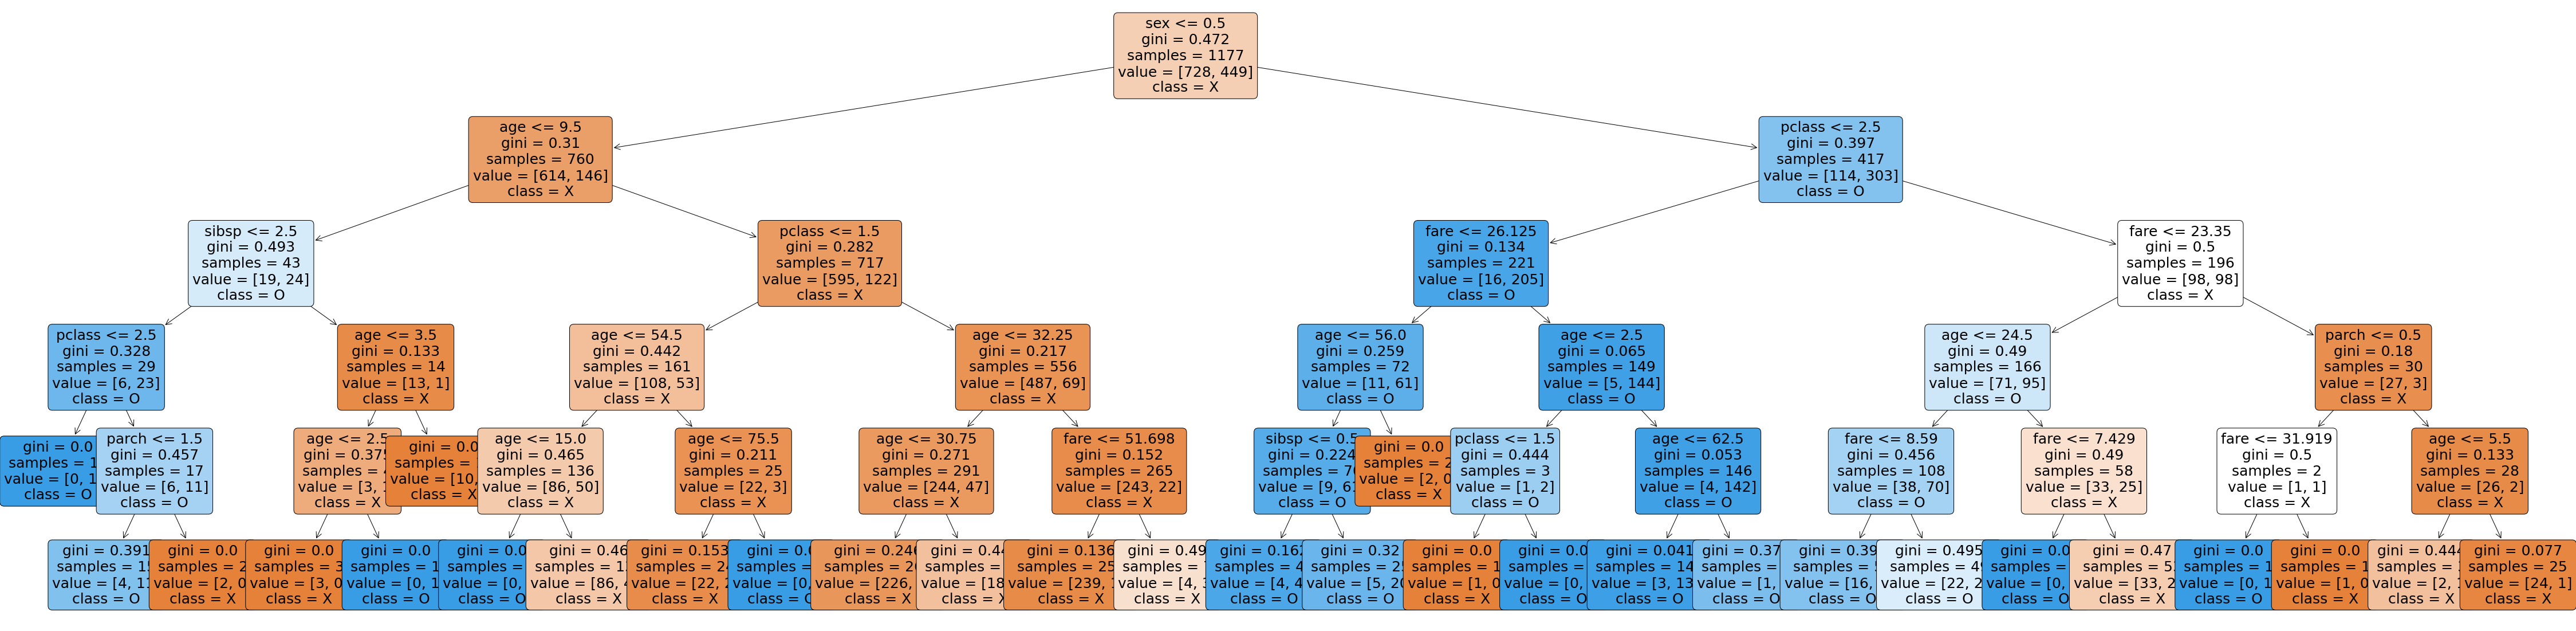

In [86]:
from sklearn.tree import plot_tree
# x_cols = [ 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare' ]  

plt.figure(figsize=(80, 20))
plot_tree(tree_clf, feature_names=x_cols, class_names=['X', 'O'], filled=True, rounded=True, fontsize=25)
plt.show()